Basic tutorial of RL environment classes and agent classes completed February 2021 by Annik Carson

In [ ]:
# basic imports for this notebook
import numpy as np
import matplotlib.pyplot as plt

# Fundamental Building Blocks of the Reinforcement Learning Problem
A reinforcement learning problem is one where we are interested in how an agent learns from its interaction with the environment it operates in. The agent gets information from the environment about what state it is in, and chooses how to act in that state. The learning problem is about how to make better and better choices with the information you have. 

When the agent chooses an action, this has some effect on the environment. The agent tells the environment "Ok, I choose to go left," and the environment gives it feedback about the consequences of that action. This feedback is in the form of information about:
* What new state does this action take the agent to. For example, from state 1 taking action "up" might take you to state 2. 
* How good or bad that state and/or action selection was in the form of a reward signal. For example, the environment might tell the agent that the reward from taking action "up" from state 1 was worth +10 points.   

image.png

Here we need to make an environment which has the following functionality:
* A defined size/shape
* A rule for the consequences of actions
  - Given the current state and action, produce a new state for the agent 
  - Given the current state, produce a reward signal upon leaving that state



# Making the Environment Class

In [ ]:
# this class includes all the attributes and functions that define the environment 
# some sections will need to be completed
class BasicEnv(object):
  def __init__(self, env_shape, nactions):
    self.shape    = env_shape                    # tuple describing dimensions of environment (row, column)
    self.nstates  = self.shape[0]*self.shape[1]  # integer number of states 
    self.nactions = nactions                     # integer number of actions available 

    self.T = self.transition_function()          # a tensor of dimension (nstates x nstates x nactions)
    
    self.R = self.reward_function()              # a vector of length nstates - one reward for each state
                                                  # a more complex reward function would be action dependent, 
                                                  # making it a matrix of dimension (nstates x nactions)

  #checks to make sure all the probabilities for a certain action add up to 1
  def check_transition_prob(self, transition_matrix):
    action=0
    check= True
    for action in range(self.nactions):
      for state in range(self.nstates):
        sum=0
        for state2 in range(self.nstates):
          sum+=transition_matrix[state, state2, action]
          if state2==self.nstates-1:
            if "%.*f" % (1,sum)!= "%.*f" % (1,1):
              check=False
              break
    return check

  def transition_function(self):
    # write a function that controls transitions between states

    # initialize a tensor of the desired shape 
    T = np.zeros((self.nstates, self.nstates, self.nactions))

    # the number at position T[s1, s2, a]
    # describes a probability of moving FROM state s1 TO state s2 given an action a 
    
    # check that all transitions probabilities out of one state sum to 1 - 
    #if self.check_transition_prob(T):
    #  return T
    #else:
    #  raise Exception("transition prob does not sum to 1 ") 
    return T

  def reward_function(self):
    # write a function that controls reward
    pass

  def move(self, current_state, selected_action): 
    # write a function that returns a new state and reward for taking a 
    # particular action in a particular state
    
    done=False

    # get next state 
    probabilities = self.T[current_state, : ,selected_action]
    next_state = np.random.choice(np.arange(self.nstates), p=probabilities)
    
    # get reward
    reward=self.R[current_state,0]

    # set condition for when the agent is finished its trial in the environment
    if reward != -1: ### NOTE: This is a poorly defined condition for done -- FIX THIS
      done=True

    return next_state, reward, done

## TASK: Write your own environment class

In [ ]:
class MyEnv(object):
  def __init__(self):
    pass

# Making a subclass of BasicEnv - BoundedGridworld

In [ ]:
class BoundedGridworld(BasicEnv):
  # this class inherits everything form the BasicEnv class 
  # here we will rewrite the class with specific transition rules which dictate
  # that the agent can move around freely within the grid but moving into a boundary 
  # will have no effect 
  def __init__(self, env_shape, nactions):
    super(BoundedGridworld,self).__init__(env_shape, nactions)        # this calls the init function of BasicEnv so we get self.nstates, etc.

    # here we write over self.T and self.R defined in the BasicEnv.__init__() 
    # using the transition_function and reward_function defined in this class, BoundedGridworld
    self.T = self.grid_transition_bounded()          # a tensor of dimension (nstates x nstates x nactions)
    
    self.R = self.reward_function()              # a vector of length nstates - one reward for each state
                                                 # a more complex reward function would be action dependent, 
                                                 # making it a matrix of dimension (nstates x nactions)
  def grid_transition_bounded(self):
    # initialize
    T = np.zeros((self.nstates, self.nstates, self.nactions))  # down, up, right, left

    # add neighbor connections and jumps, remove for endlines
    #T [starting_state, ending_state, action]
    T[list(range(0, self.nstates-self.shape[1])), list(range(self.shape[1],self.nstates)), 0] = 1     #down
    T[list(range(self.shape[1],self.nstates)),  list(range(0, self.nstates-self.shape[1])),1] = 1     # up
    T[list(range(0, self.nstates-1)),               list(range(1, self.nstates)),              2] = 1     # right
    T[list(range(1, self.nstates)),               list(range(0, self.nstates-1)),              3] = 1     # left

    #remove endlines
    T[list(range(self.shape[1]-1, self.nstates-1, self.shape[1])), list(range(self.shape[1], self.nstates, self.shape[1])),  2 ] = 0    # remove transitions from endlines on right action
    T[list(range(0,self.nstates-self.shape[1]+1, self.shape[1])) , list(range(-1,self.nstates-self.shape[1], self.shape[1])), 3] = 0    # remove transitions from endlines on left action
    # include self transitions 
    #T[start_state, end_state, action]
    T[list(range(self.nstates-self.shape[1],self.nstates)),list(range(self.nstates-self.shape[1], self.nstates)), 0] = 1
    T[list(range(self.shape[1])),list(range(self.shape[1])), 1] = 1    
    T[list(range(self.shape[1]-1, self.nstates, self.shape[1])), list(range(self.shape[1]-1, self.nstates, self.shape[1])),  2 ] = 1
    T[list(range(0,self.nstates-self.shape[1]+1, self.shape[1])) , list(range(0,self.nstates-self.shape[1]+1, self.shape[1])), 3] = 1

    if self.check_transition_prob(T) == True:
      return T
    else:
      raise Exception("transition prob does not sum to 1 ") 
  
  def reward_function(self):
    R = np.ones((self.nstates, 1))*-1 # reward is -1 in all states for all actions
    R[-1] = 100                       # reward is 100 in last state 
    return R 



# Another Subclass - EdgewrapGridworld

In [ ]:
class EdgewrapGridworld(BasicEnv):
  # this class inherits everything form the BasicEnv class 
  # here we will rewrite the class with specific transition rules which dictate
  # that the agent can move around freely within the grid and that moving off the
  # grid on one side will return you to the other side of the grid (ex. pacman)

  def __init__(self, env_shape, nactions):
    super().__init__(env_shape, nactions)        # this calls the init function of BasicEnv so we get self.nstates, etc.

    # here we write over self.T and self.R defined in the BasicEnv.__init__() 
    # using the grid_transition_edgeWrapping and reward_function defined in this class, EdgewrapGridworld
    self.T = self.grid_transtion_edgeWrapping()
    
    self.R = self.reward_function()
    
  #creates transition matrix for edge-wrapping environment
  def grid_transtion_edgeWrapping(self):    
    # initialize
    T = np.zeros((self.nstates, self.nstates, self.nactions))  #T [starting_state, ending_state, action]

    # add neighbor connections 
    T[list(range(0, self.nstates-self.shape[1])), list(range(self.shape[1],self.nstates)), 0] = 1     #down
    T[list(range(self.shape[1],self.nstates)),  list(range(0, self.nstates-self.shape[1])),1] = 1     # up
    T[list(range(0, self.nstates-1)),               list(range(1, self.nstates)),              2] = 1     # right
    T[list(range(1, self.nstates)),               list(range(0, self.nstates-1)),              3] = 1     # left

    #remove endlines
    T[list(range(self.shape[1]-1, self.nstates-1, self.shape[1])), list(range(self.shape[1], self.nstates, self.shape[1])),  2 ] = 0 # remove transitions from endlines on right action
    T[list(range(0,self.nstates-self.shape[1]+1, self.shape[1])) , list(range(-1,self.nstates-self.shape[1], self.shape[1])), 3] = 0 # remove transitions from endlines on left action
    
    #add in connections to wrap around environment - return you to same line you were in on the other side
    T[list(range(self.nstates-self.shape[1],self.nstates)),list(range(self.shape[1])), 0] = 1
    T[list(range(self.shape[1])),list(range(self.nstates-self.shape[1],self.nstates)), 1] = 1    
    T[list(range(self.shape[1]-1, self.nstates, self.shape[1])),list(range(0,self.nstates-self.shape[1]+1, self.shape[1])) ,  2 ] = 1 
    T[list(range(0,self.nstates-self.shape[1]+1, self.shape[1])) , list(range(self.shape[1]-1, self.nstates, self.shape[1])), 3] = 1
    
    if self.check_transition_prob(T) == True:
      return T
    else:
      raise Exception("transition prob does not sum to 1 ") 
  
  def reward_function(self):
    R = np.ones((self.nstates, 1))*-1 # reward is -1 in all states for all actions
    R[-1] = 100                       # reward is 100 in last state 
    return R 

# Another Subclass - CliffWorld 
This environment is used to highlight the differences in tabular Q learning and SARSA (Sutton and Barto section 6.5 example 6.6 - Cliff walking)

In [ ]:
class CliffWorld(BasicEnv):
  def __init__(self, env_shape, nactions):
    super().__init__(env_shape, nactions)        # this calls the init function of BasicEnv so we get self.nstates, etc.

    # here we write over self.T and self.R defined in the BasicEnv.__init__() 
    # using the transition_function and reward_function defined in this class, CliffWorld
    self.T = self.grid_transtion_cliff_bottom()
    
    self.R = self.set_cliff_reward()

  #creates transition vector for cliff environment
  def grid_transtion_cliff_bottom(self):
    T = np.zeros((self.nstates, self.nstates, self.nactions)) #T [starting_state, ending_state, action]

    # add neighbor connections and jumps, remove for endlines
    T[list(range(0, self.nstates-2*self.shape[1])), list(range(self.shape[1],self.nstates-self.shape[1])), 0] = 1     #down
    T[list(range(self.shape[1],self.nstates)),  list(range(0, self.nstates-self.shape[1])),1] = 1     # up
    T[list(range(0, self.nstates-1)),               list(range(1, self.nstates)),              2] = 1     # right
    T[list(range(1, self.nstates)),               list(range(0, self.nstates-1)),              3] = 1     # left

    #remove endlines
    T[list(range(self.shape[1]-1, self.nstates-1, self.shape[1])), list(range(self.shape[1], self.nstates, self.shape[1])),  2 ] = 0    # remove transitions from endlines on right action
    T[list(range(0,self.nstates-self.shape[1]+1, self.shape[1])) , list(range(-1,self.nstates-self.shape[1], self.shape[1])), 3] = 0    # remove transitions from endlines on left action
    # include self transitions 
    #T[start_state, end_state, action]
    T[list(range(self.nstates-self.shape[1],self.nstates)),list(range(self.nstates-self.shape[1], self.nstates)), 0] = 1
    T[list(range(self.shape[1])),list(range(self.shape[1])), 1] = 1    
    T[list(range(self.shape[1]-1, self.nstates, self.shape[1])), list(range(self.shape[1]-1, self.nstates, self.shape[1])),  2 ] = 1
    T[list(range(0,self.nstates-self.shape[1]+1, self.shape[1])) , list(range(0,self.nstates-self.shape[1]+1, self.shape[1])), 3] = 1

    #moving into the cliff states, takes agent back to start 
    T[list(range((self.shape[1]*(self.shape[0]-2))+1,(self.shape[1]*(self.shape[0]-1))-1)), self.nstates-self.shape[1], 0] = 1 #when taking down action from states above cliff states
    T[(self.shape[1]*(self.shape[0]-2)),self.nstates-self.shape[1], 0]=1
    T[(self.shape[1]*(self.shape[0]-1))-1,self.nstates-1, 0]=1
    T[self.nstates-self.shape[1], self.nstates-self.shape[1]+1, 2] = 0
    T[self.nstates-self.shape[1], self.nstates-self.shape[1], 2] = 1 #from the left of cliff states
    T[self.nstates-1, self.nstates-2, 3] = 0
    T[self.nstates-1, self.nstates-self.shape[1], 3] = 1 #from the right of cliff states

    if self.check_transition_prob(T) == True:
      return T
    else:
      raise Exception("transition prob does not sum to 1 ") 
  
  #creates reward vector for the cliff evironment where all cliff states are worth -100 and terminal state is 100
  def set_cliff_reward(self):
    R=np.ones((self.nstates,1))*-1
    R[-1] = 100
    R[list(range((self.shape[1]*(self.shape[0]-2))+1,(self.shape[1]*(self.shape[0]-1))-1))] = -100
    return R

# Create an Environment and test the move() function

In [ ]:
env_shape = (10,10)
num_actions = 4
named_actions = ['Down', 'Up', 'Right','Left']
bounded_env = BoundedGridworld(env_shape, num_actions)
wrapped_env = EdgewrapGridworld(env_shape, num_actions)

In [ ]:
start_state = 0
action      = np.random.choice(num_actions)
next_state, reward, done  = bounded_env.move(start_state, action)
print(f'Started in state {start_state}, took action {action}:{named_actions[action]}, moved to state {next_state}')

Started in state 0, took action 0:Down, moved to state 10


# Make a basic "agent"
An agent takes in information of state and produces an action
The most basic agent will just choose actions randomly

In [ ]:
class RandomAgent(object):
  def __init__(self, num_actions):
    self.num_actions = num_actions
  def select_action(self, state):
    # state actually does nothing in this agent, but we will want our action selection
    # in later agents to be based on the state we're in
    action = np.random.choice(self.num_actions)
    return action


# Take a step in the environment with your agent
This is identical to what we did above, but now we're wrapping it up in an agent class

In [ ]:
# make agent 
agent = RandomAgent(num_actions)

start_state = 0
### here we select the action with the agent instead
action      = agent.select_action(start_state)
next_state, reward, done  = bounded_env.move(start_state, action)
print(f'Started in state {start_state}, took action {action}:{named_actions[action]}, moved to state {next_state}')

Started in state 0, took action 1:Up, moved to state 0


# Take multiple steps in the environment with your random agent 
Write a function to take random actions in the environment for some number of trials (trial end when done=True)

In [ ]:
def navigate_env(env, agent, num_trials, random_start=False):
  reward_per_trial = []
  for trial in range(num_trials):
    total_reward = 0
    done = False

    if random_start:
      start = np.random.choice(env.nstates)
    else: 
      state = 0 
    while not done:
      # randomly sample an action 
      action = agent.select_action(state)

      # take a step in the environment
      next_state, reward, done = env.move(state, action)

      # keep running total of rewards observed
      total_reward += reward

      if done:
        break

      state = next_state
    reward_per_trial.append(total_reward)
    # every 50 trials print something:
    if trial%50==0:
      print(f'Trial: {trial}, Total Reward = {total_reward}')
  return reward_per_trial

In [ ]:
# the navigate function takes an environment as an object, so you can pass either bounded_env or wrapped_env
num_trials = 100

## bounded_env, wrapped_env, and agent all instantiated above 
bounded_rewards =navigate_env(bounded_env, agent, num_trials, random_start=False)
wrapped_rewards = navigate_env(wrapped_env,agent, num_trials, random_start=False)

Trial: 0, Total Reward = -921.0
Trial: 50, Total Reward = -8.0
Trial: 0, Total Reward = 98.0
Trial: 50, Total Reward = 96.0


Plot the results of random action selection. Which does better? Why? 

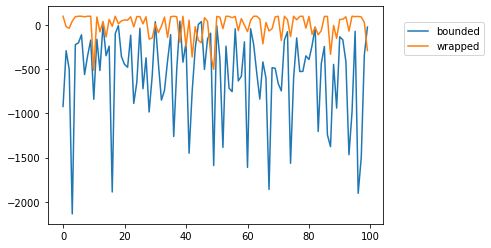

In [ ]:
plt.figure()
plt.plot(bounded_rewards, label='bounded')
plt.plot(wrapped_rewards, label='wrapped')
plt.legend(bbox_to_anchor=(1.05,0.95))
plt.show()